In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px
from PIL import Image
import re
import tensorflow as tf
import random

# Load the Data

## Train Data

In [2]:
train_path = 'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train'

filepaths = []

labels = []

folds = os.listdir(train_path)

for fold in folds:
    f_path = os.path.join(train_path, fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path, file))
        labels.append(fold)

X_train = pd.Series(filepaths, name= 'filepaths')
Y_train = pd.Series(labels, name= 'labels')
df = pd.concat([X_train, Y_train], axis= 1)

In [3]:
df

,filepaths,labels
0,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
1,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
2,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
3,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
4,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
...,...,...
5211,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA
5212,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA
5213,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA
5214,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA


## Test Data

In [4]:
test_path = 'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/test'

filepaths = []

labels = []

folds = os.listdir(test_path)

for fold in folds:
    f_path = os.path.join(test_path, fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path, file))
        labels.append(fold)

X_test = pd.Series(filepaths, name= 'filepaths')
Y_test = pd.Series(labels, name= 'labels')
test = pd.concat([X_test, Y_test], axis= 1)

In [5]:
test

,filepaths,labels
0,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
1,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
2,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
3,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
4,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
...,...,...
619,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA
620,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA
621,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA
622,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA


## Validation Data

In [6]:
val_path = 'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/val'

filepaths = []

labels = []

folds = os.listdir(val_path)

for fold in folds:
    f_path = os.path.join(val_path, fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path, file))
        labels.append(fold)

X_val = pd.Series(filepaths, name= 'filepaths')
Y_val = pd.Series(labels, name= 'labels')
valid = pd.concat([X_val, Y_val], axis= 1)

In [7]:
valid

,filepaths,labels
0,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
1,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
2,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
3,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
4,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
5,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
6,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
7,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
8,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA
9,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA


## Graph of the Number of Classified samples in the training data

In [8]:
import plotly.express as px

fig = px.histogram(data_frame= df,
                   y = df['labels'],
                   template= 'plotly_white',
                   color = df['labels'].values,
                   title= 'Count of Pneumonia and Normal in the train data')
fig.show()

## Graph of Number of Classified samples in the Test Data

In [9]:
fig2 = px.histogram(data_frame= test,
                   y = test['labels'],
                   template= 'plotly_white',
                   color = test['labels'].values,
                   title= 'Count of Pneumonia and Normal in the test data')
fig2.show()

## Splitting and shuffling the training Data into train_df, val_df, and test_df

In [10]:
from sklearn.model_selection import train_test_split

train_df, dummy_df = train_test_split(df, train_size= 0.8, shuffle= True, random_state= 24)
val_df, test_df = train_test_split(dummy_df, train_size= 0.6, shuffle= True, random_state= 24)

## Processing the train, test, and validation datasets to be view as an image

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (256, 256)
batch_size = 8

image_shape = (image_size[0], image_size[1], 3)

def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar)
ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe(train_df, x_col = 'filepaths', y_col = 'labels', target_size= image_size, class_mode= 'categorical', color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = tr_gen.flow_from_dataframe(test_df, x_col = 'filepaths', y_col = 'labels', target_size= image_size, class_mode= 'categorical', color_mode= 'rgb', shuffle= True, batch_size= batch_size)

val_gen = tr_gen.flow_from_dataframe(val_df, x_col = 'filepaths', y_col = 'labels', target_size= image_size, class_mode= 'categorical', color_mode= 'rgb', shuffle= True, batch_size= batch_size)

Found 4172 validated image filenames belonging to 2 classes.
Found 418 validated image filenames belonging to 2 classes.
Found 626 validated image filenames belonging to 2 classes.


## Sample of the images in the train data

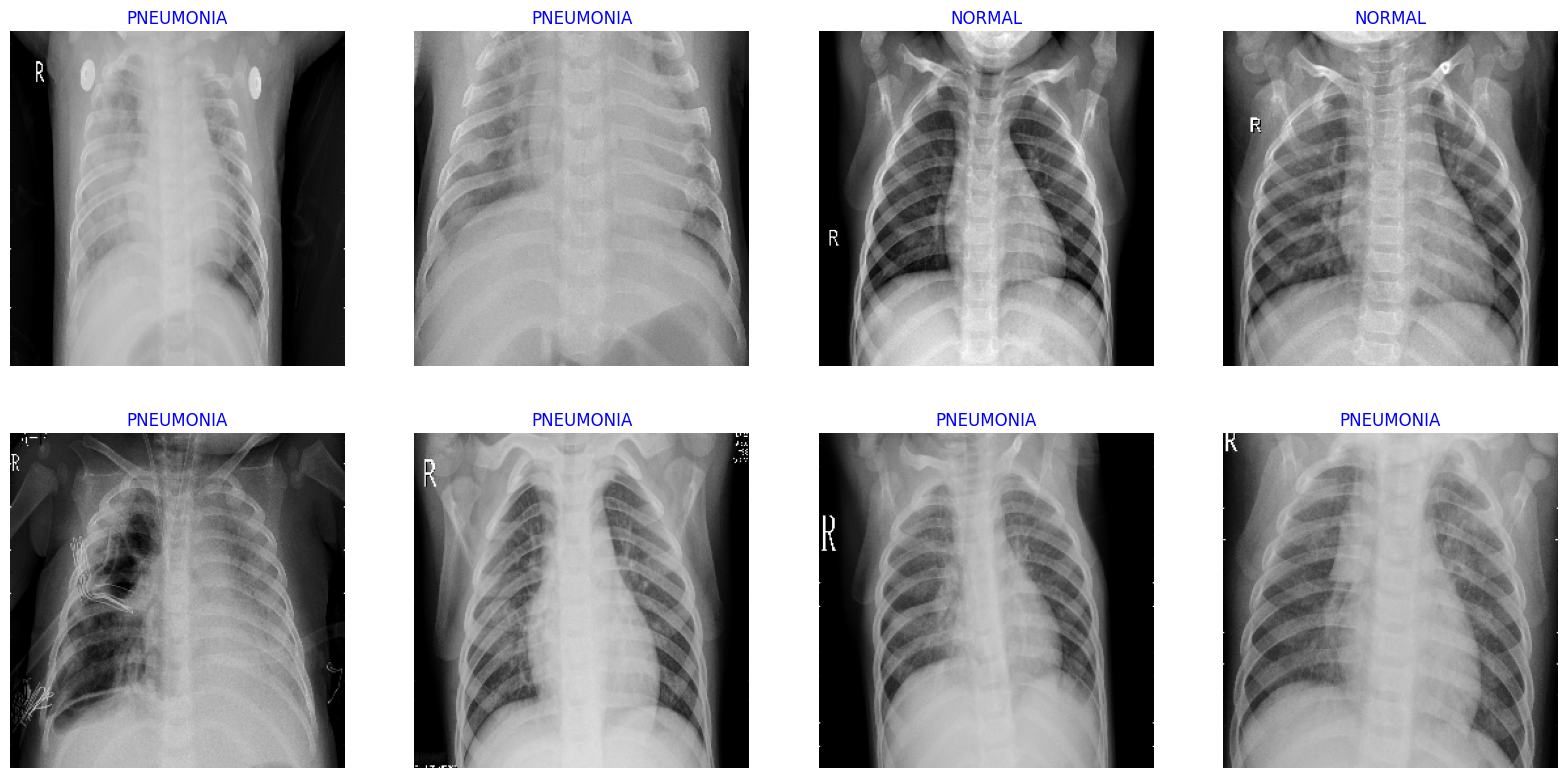

In [12]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(8):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
plt.show()

In [13]:
train_df

,filepaths,labels
4973,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA
3681,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA
4425,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA
2613,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA
4597,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA
...,...,...
2193,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA
3473,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,PNEUMONIA
343,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL
899,C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumon...,NORMAL


## Splitting data in to X_train, X_test, and X_val for model preparation

In [14]:
X_train = train_df['filepaths']
X_test = test_df['filepaths']
X_val = val_df['filepaths']
Y_train = train_df['labels']
Y_test = test_df['labels']
Y_val = val_df['labels']

In [15]:
X_train = X_train.values
X_test = X_test.values
X_val = X_val.values
X_train

array(['C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person866_bacteria_2788.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person407_bacteria_1822.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person596_bacteria_2446.jpeg',
       ...,
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\NORMAL\\IM-0525-0001-0002.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\NORMAL\\NORMAL2-IM-0838-0001.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person621_virus_1194.jpeg'],
      dtype=object)

In [16]:
X_test

array(['C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person1548_bacteria_4048.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\NORMAL\\NORMAL2-IM-0480-0001.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person348_virus_720.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person321_bacteria_1487.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person1312_bacteria_3316.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person1328_bacteria_3376.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person374_bacteria_1712.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person470_bacteria_2003.jpeg',
       

In [17]:
X_val

array(['C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person485_virus_988.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\NORMAL\\NORMAL2-IM-0702-0001.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person31_bacteria_160.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person1404_bacteria_3561.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person75_bacteria_365.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\NORMAL\\NORMAL2-IM-1089-0001.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person14_bacteria_51.jpeg',
       'C:/Users/Jake/VSCODEJavaScript/ThinkfulPneumoniaCapstone/chest_xray/train\\PNEUMONIA\\person653_bacteria_2545.jpeg',
       'C:/Users/Jake/

## Converting the data into a numpy array and rexiszing the data to 256 x 256 x 3

In [18]:
import cv2

def load_image_as_array(file_path, target_size= (256, 256)):
    image = cv2.imread(file_path)
    resized_image = cv2.resize(image, target_size)

    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    return image_rgb

image_arrays = [load_image_as_array(file_path) for file_path in X_train]

image_arrays_np = np.stack(image_arrays, axis = 0)

print("Shape of the array containing image data:", image_arrays_np.shape)

Shape of the array containing image data: (4172, 256, 256, 3)


In [19]:
X_train = image_arrays_np
X_train

array([[[[  9,   9,   9],
         [  7,   7,   7],
         [  5,   5,   5],
         ...,
         [ 30,  30,  30],
         [ 30,  30,  30],
         [ 29,  29,  29]],

        [[  8,   8,   8],
         [  7,   7,   7],
         [  5,   5,   5],
         ...,
         [ 30,  30,  30],
         [ 33,  33,  33],
         [ 31,  31,  31]],

        [[  7,   7,   7],
         [  6,   6,   6],
         [ 11,  11,  11],
         ...,
         [ 27,  27,  27],
         [ 33,  33,  33],
         [ 34,  34,  34]],

        ...,

        [[ 62,  62,  62],
         [ 58,  58,  58],
         [ 55,  55,  55],
         ...,
         [ 25,  25,  25],
         [ 23,  23,  23],
         [ 23,  23,  23]],

        [[ 62,  62,  62],
         [ 59,  59,  59],
         [ 54,  54,  54],
         ...,
         [ 25,  25,  25],
         [ 24,  24,  24],
         [ 24,  24,  24]],

        [[ 62,  62,  62],
         [ 59,  59,  59],
         [ 55,  55,  55],
         ...,
         [ 25,  25,  25],
        

In [20]:
image_arrays = [load_image_as_array(file_path) for file_path in X_test]
image_arrays_np = np.stack(image_arrays, axis= 0)
print("Shape of the array containing image data:", image_arrays_np.shape)

Shape of the array containing image data: (418, 256, 256, 3)


In [21]:
X_test = image_arrays_np
X_test

array([[[[132, 132, 132],
         [146, 146, 146],
         [146, 146, 146],
         ...,
         [ 36,  36,  36],
         [  3,   3,   3],
         [ 10,  10,  10]],

        [[111, 111, 111],
         [145, 145, 145],
         [144, 144, 144],
         ...,
         [  8,   8,   8],
         [  2,   2,   2],
         [  2,   2,   2]],

        [[101, 101, 101],
         [135, 135, 135],
         [145, 145, 145],
         ...,
         [  3,   3,   3],
         [  1,   1,   1],
         [  2,   2,   2]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [22]:
image_arrays = [load_image_as_array(file_path) for file_path in X_val]
image_arrays_np = np.stack(image_arrays, axis= 0)
print("Shape of the array containing image data:", image_arrays_np.shape)

Shape of the array containing image data: (626, 256, 256, 3)


In [23]:
X_val = image_arrays_np
X_val

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [254, 254, 254],
         ...,
         [ 34,  34,  34],
         [ 31,  31,  31],
         [ 26,  26,  26]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [254, 254, 254],
         ...,
         [ 34,  34,  34],
         [ 28,  28,  28],
         [ 28,  28,  28]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [254, 254, 254],
         ...,
         [ 37,  37,  37],
         [ 29,  29,  29],
         [ 26,  26,  26]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

## We get a 3 dimensional array with 4,172 samples for the X_train

In [24]:
X_train.shape

(4172, 256, 256, 3)

## 418 for the X_test

In [25]:
X_test.shape

(418, 256, 256, 3)

## and 626 for the validation

In [26]:
X_val.shape

(626, 256, 256, 3)

## Reshape the image for model

In [27]:
input_dim = 256 * 256 * 3

X_train = X_train.reshape(4172, input_dim)
X_test = X_test.reshape(418, input_dim)
X_val = X_val.reshape(626, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255

In [28]:
X_train.shape

(4172, 196608)

In [29]:
X_test.shape

(418, 196608)

In [30]:
X_val.shape

(626, 196608)

## Convert Y_train, Y_test, and Y_val to a categorical variable

In [31]:
Y_train = Y_train.values
Y_test = Y_test.values
Y_val = Y_val.values
Y_train

array(['PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', ..., 'NORMAL', 'NORMAL',
       'PNEUMONIA'], dtype=object)

In [32]:
Y_test

array(['PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL',
       'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA',
       'NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA',
       'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA',
       'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA',
       'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL',
       'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL',

In [33]:
Y_val

array(['PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA',
       'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL',
       'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL',
       'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'NORMAL',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL',
       'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'N

In [34]:
class_1 = 'PNEUMONIA'
class_2 = 'NORMAL'

y_train_bi = np.where(np.array(Y_train) == class_1, 1, 0)
y_test_bi = np.where(np.array(Y_test) == class_1, 1, 0)
y_val_bi = np.where(np.array(Y_val) == class_1, 1, 0)

In [35]:
y_train_bi

array([1, 1, 1, ..., 0, 0, 1])

In [36]:
y_test_bi

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,

In [37]:
y_val_bi

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [38]:
y_train_bi.shape

(4172,)

In [39]:
y_test_bi.shape

(418,)

In [40]:
y_val_bi.shape

(626,)

In [41]:
from tensorflow.keras.utils import to_categorical

output_dim = nb_classes = 2
Y_train = to_categorical(y_train_bi, nb_classes)
Y_test = to_categorical(y_test_bi, nb_classes)
Y_val = to_categorical(y_val_bi, nb_classes)

In [42]:
Y_train.shape

(4172, 2)

In [43]:
Y_test.shape

(418, 2)

In [45]:
Y_val.shape

(626, 2)

## First model with stochastic gradient descent as the optimizer

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import layers

model1 = Sequential()

model1.add(Dense(128, input_shape= (input_dim,), activation= 'relu'))
model1.add(Dense(64, input_shape= (input_dim,), activation= 'relu'))
model1.add(Dense(32, input_shape= (input_dim,), activation= 'relu'))
model1.add(Dense(2, activation= 'softmax'))

In [49]:
model1.compile(optimizer= 'sgd', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [50]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               25165952  
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 25,176,354
Trainable params: 25,176,354
Non-trainable params: 0
_________________________________________________________________


In [51]:
model1.fit(X_train, Y_train, batch_size= batch_size, validation_data= (X_val, Y_val), epochs= 20, verbose= 1)

Epoch 1/20
522/522 [==============================] - 30s 57ms/step - loss: 0.4364 - accuracy: 0.8063 - val_loss: 0.3020 - val_accuracy: 0.8003
Epoch 2/20
522/522 [==============================] - 30s 57ms/step - loss: 0.2811 - accuracy: 0.9010 - val_loss: 0.1888 - val_accuracy: 0.9457
Epoch 3/20
522/522 [==============================] - 30s 57ms/step - loss: 0.2168 - accuracy: 0.9089 - val_loss: 0.1926 - val_accuracy: 0.9377
Epoch 4/20
522/522 [==============================] - 30s 57ms/step - loss: 0.1867 - accuracy: 0.9259 - val_loss: 0.1218 - val_accuracy: 0.9505
Epoch 5/20
522/522 [==============================] - 30s 57ms/step - loss: 0.1713 - accuracy: 0.9350 - val_loss: 0.1348 - val_accuracy: 0.9505
Epoch 6/20
522/522 [==============================] - 30s 57ms/step - loss: 0.1685 - accuracy: 0.9360 - val_loss: 0.3549 - val_accuracy: 0.8594
Epoch 7/20
522/522 [==============================] - 30s 57ms/step - loss: 0.1494 - accuracy: 0.9410 - val_loss: 0.1303 - val_accuracy:

In [52]:
score = model1.evaluate(X_test, Y_test, verbose= 0)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Test score:  0.08702125400304794
Test accuracy:  0.9641148447990417


## Second Model with Adam as the optimizer

In [53]:
model2 = Sequential()

model2.add(Dense(128, input_shape= (input_dim,), activation= 'relu'))
model2.add(Dense(64, input_shape= (input_dim,), activation= 'relu'))
model2.add(Dense(32, input_shape= (input_dim,), activation= 'relu'))
model2.add(Dense(2, activation= 'softmax'))

In [54]:
model2.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [55]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               25165952  
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 25,176,354
Trainable params: 25,176,354
Non-trainable params: 0
_________________________________________________________________


In [56]:
model2.fit(X_train, Y_train, batch_size= batch_size, validation_data= (X_val, Y_val), epochs= 20, verbose= 1)

Epoch 1/20
522/522 [==============================] - 98s 187ms/step - loss: 1.7320 - accuracy: 0.8727 - val_loss: 0.2210 - val_accuracy: 0.9361
Epoch 2/20
522/522 [==============================] - 97s 186ms/step - loss: 0.3469 - accuracy: 0.9046 - val_loss: 0.1610 - val_accuracy: 0.9489
Epoch 3/20
522/522 [==============================] - 97s 186ms/step - loss: 0.2353 - accuracy: 0.9154 - val_loss: 0.1993 - val_accuracy: 0.9601
Epoch 4/20
522/522 [==============================] - 97s 186ms/step - loss: 0.1878 - accuracy: 0.9334 - val_loss: 0.2156 - val_accuracy: 0.9249
Epoch 5/20
522/522 [==============================] - 97s 185ms/step - loss: 0.1523 - accuracy: 0.9420 - val_loss: 0.3933 - val_accuracy: 0.8099
Epoch 6/20
522/522 [==============================] - 97s 186ms/step - loss: 0.1530 - accuracy: 0.9418 - val_loss: 0.1344 - val_accuracy: 0.9569
Epoch 7/20
522/522 [==============================] - 97s 186ms/step - loss: 0.1601 - accuracy: 0.9365 - val_loss: 0.1344 - val_ac

In [57]:
score = model2.evaluate(X_test, Y_test, verbose= 0)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Test score:  0.09977378696203232
Test accuracy:  0.9545454382896423


# Model Performance

## Model 1

### Obtained an Accuracy of 0.9641 with Batch Size of 8 and epochs set to 20.

### Took a little under 10 minutes to run.

### This model is ideal for predicting if Pneumonia is within the lungs using an X-ray image.

## Model 2

### Obtained an Accuracy of 0.9545 with same number of batch and epochs.

### Took over 30 minutes to run.

### This model is less ideal due to runtime and less Accuracy compared to the first model.